## **Задание 1 - Локализация корней**

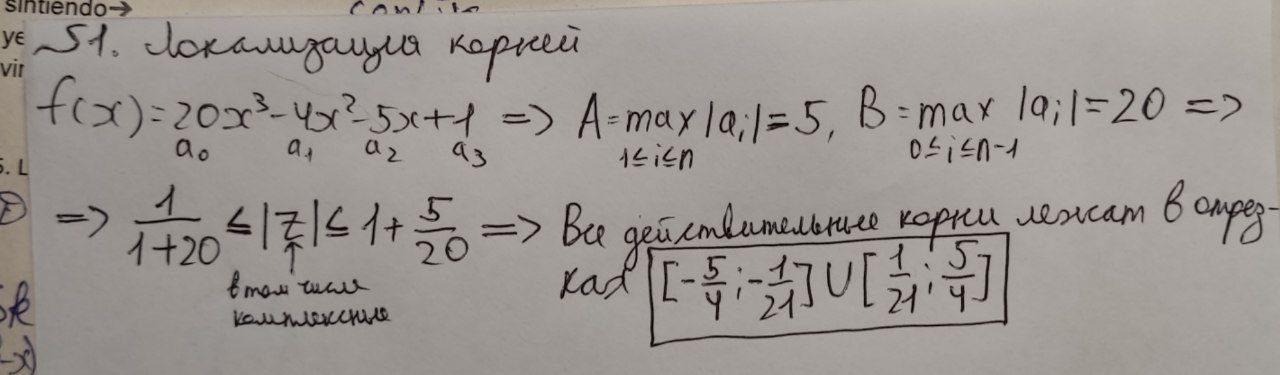

In [70]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
def f(x, eps=10**(-6), sign=1):
    if 20*x**3 - 4*x**2-5*x+1 == 0:
        return f(x+sign*eps)
    return 20*x**3 - 4*x**2-5*x+1

def df(x, eps=10**(-6), sign=1):
    if 60*x**2-8*x-5 == 0:
        return f(x+sign*eps)
    return 60*x**2-8*x-5

def d2f(x, eps=10**(-6), sign=1):
    if 120*x-8 == 0:
        return f(x+sign*eps)
    return 120*x-8

def d3f(x, eps=10**(-6), sign=1):
    return 120

def s(x, sign):
    asign = np.sign(np.array([f(x,sign=sign), df(x,sign=sign), d2f(x,sign=sign), d3f(x,sign=sign)]))
    signchange = ((np.roll(asign, 1) - asign) != 0).astype(int)
    signchange[0]=0
    return signchange.sum()

Пройдёмся по отрезкам вида $[x,\dfrac{5}{4}]$

In [11]:
xs = np.linspace(1/21, 5/4, 10)

for x in xs:
    print(x,s(x,1), 5/4, s(5/4,-1))

0.047619047619047616 2 1.25 0
0.18121693121693122 2 1.25 0
0.3148148148148148 1 1.25 0
0.44841269841269843 1 1.25 0
0.5820105820105821 0 1.25 0
0.7156084656084656 0 1.25 0
0.8492063492063493 0 1.25 0
0.9828042328042328 0 1.25 0
1.1164021164021165 0 1.25 0
1.25 0 1.25 0


Видим, что на отрезке $[0,5820\dots, \dfrac{5}{4}]$ (и соответственно последующих вложенных в него) по теореме Бюдана-Фурье нет действительных корней. Тогда на отрезке $[0,3148\dots, 0,5820\dots]$ есть 1 действительный корень, а на отрезке $[\dfrac{1}{21}, 0,3148\dots]$ - ещё один (т.к согласно теореме их либо 2 либо 0 на отрезке, например, $[\dfrac{1}{21}, \dfrac{5}{4}]$, однако мы точно знаем, что на $[0,3148\dots, 0,5820\dots]$ есть корень, поэтому остаётся только вариант с 2 корнями на "большом" отрезке)

Аналогично пройдёмся по отрезкам вида $[-\dfrac{5}{4}, x]$

In [15]:
for x in xs:
    print(-5/4, s(-5/4,1), -x,s(-x,-1))

-1.25 3 -0.047619047619047616 2
-1.25 3 -0.18121693121693122 2
-1.25 3 -0.3148148148148148 2
-1.25 3 -0.44841269841269843 2
-1.25 3 -0.5820105820105821 3
-1.25 3 -0.7156084656084656 3
-1.25 3 -0.8492063492063493 3
-1.25 3 -0.9828042328042328 3
-1.25 3 -1.1164021164021165 3
-1.25 3 -1.25 3


Также видим, что на отрезке $[-\dfrac{5}{4},-0.5820\dots]$ нет корней, а на отрезке $[-0.5820\dots,-\dfrac{1}{21}]$ - 1 корень

Итого получили 3 действительныз корня: на отрезках $[-0.5820\dots,-\dfrac{1}{21}]$, $[\dfrac{1}{21}, 0,3148\dots]$ и $[0,3148\dots, 0,5820\dots]$ соответственно. 

(Беря всё больше и больше точек разбиения "большого" отрезка могли бы получать всё более точные коориднаты нулей, однако для этого существуют и другие алгоритмы + в задаче просят только локализовать, что мы и так сделали.)

Построим функция и проверим координаты нулей

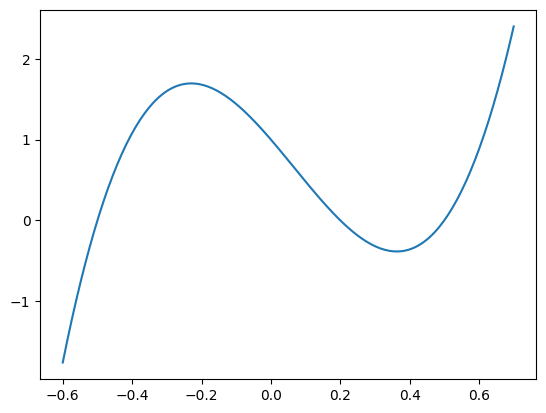

In [22]:
x = np.linspace(-0.6,0.7, 200)

plt.plot(x, 20*x**3 - 4*x**2-5*x+1)

Действительно на вычисленных отрезках есть по одному нулю функции, а других нулей нет

## **Задание 2 - Порядок сходимости итерационного метода**

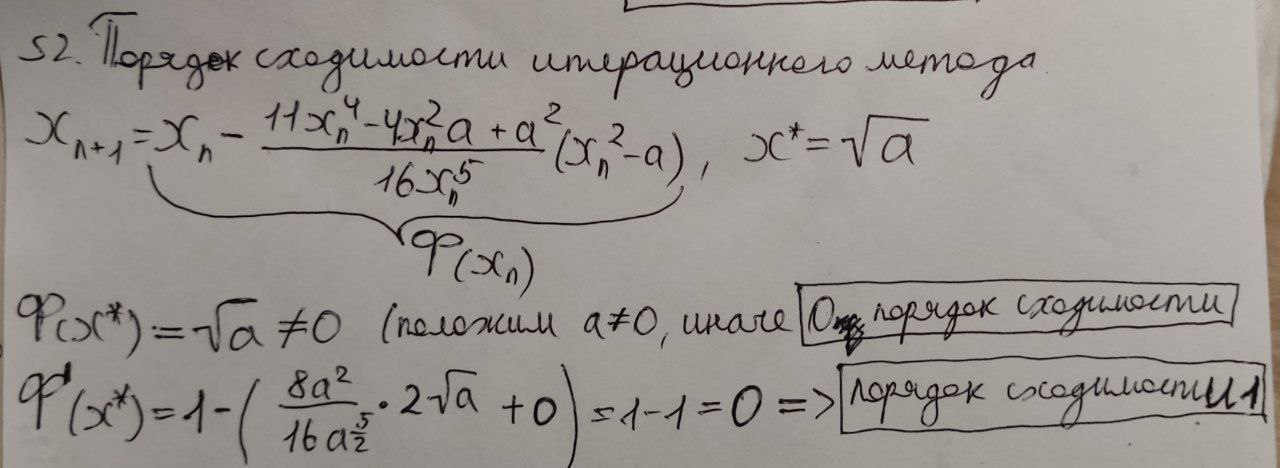

## **Задание 3 - Метод Ньютона и Гаусса-Ньютона**

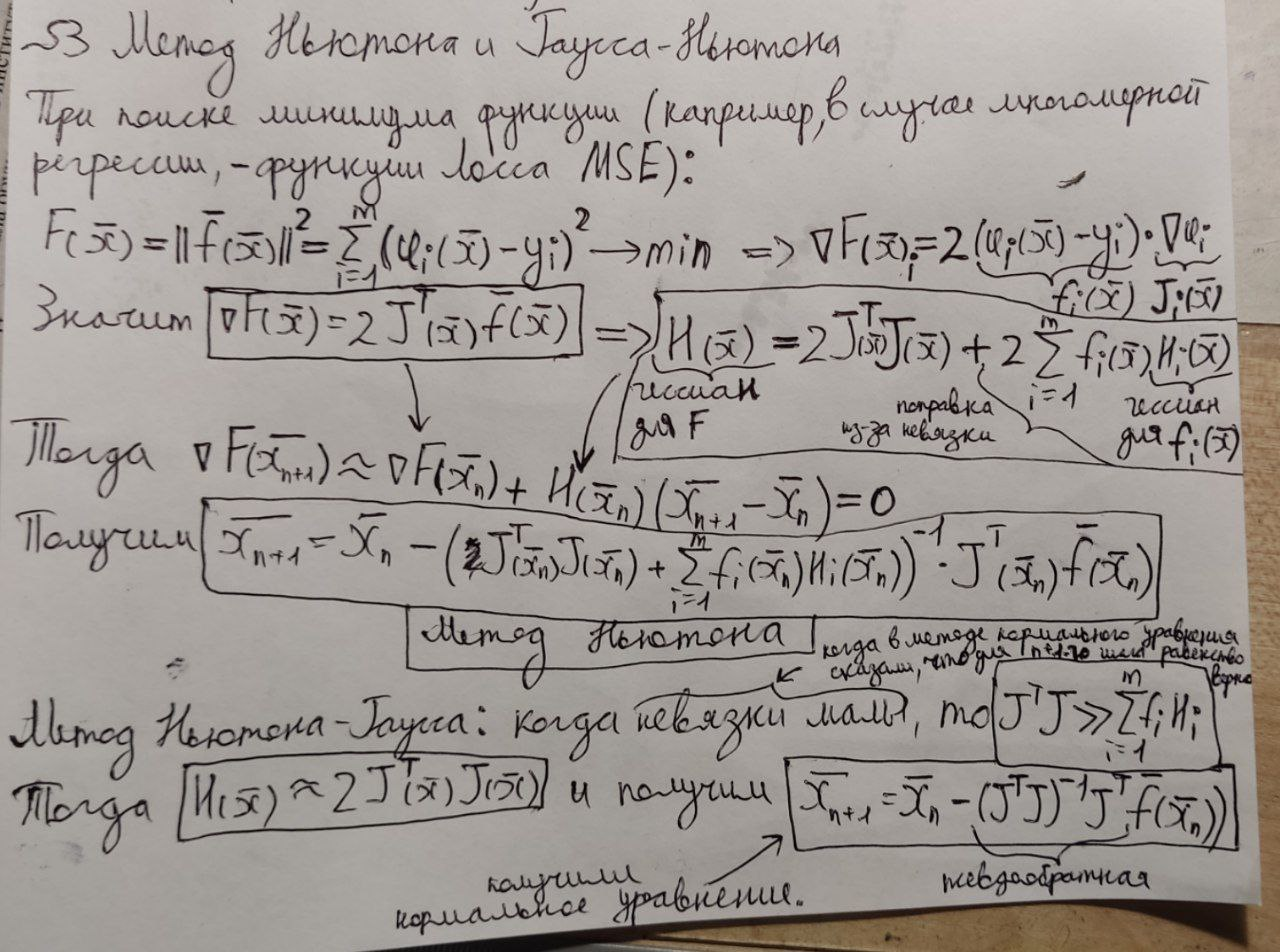

## **Задание 4 - Зри в корень**

 a) $(0.5)^x+1=(x-1)^2 \Leftrightarrow (0.5)^x+1 - (x-1)^2 = 0$ 

Посмотрим на функцию

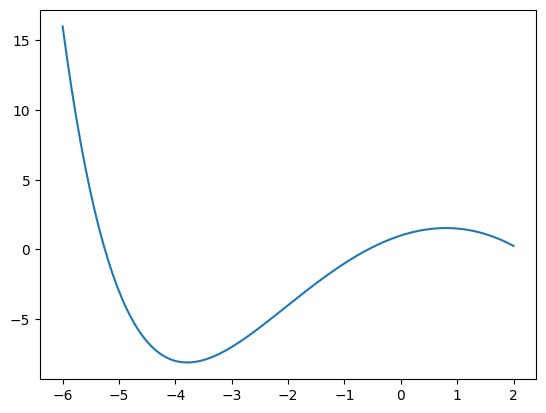

In [30]:
xs = np.linspace(-6,2,200)
plt.plot(xs, 0.5**xs+1-(xs-1)**2)

Допустим будем искать корень, лежащий в промежутке $[-2,1]$, методом **дихотомии**.

In [33]:
def f(x):
    return 0.5**x+1-(x-1)**2

def dich(a,b,f,eps=10**(-6)):

    if f(a)*f(b)>0:
        print("Error")
        return
    if f(a)==0:
        return a
    if f(b) == 0:
        return b
    
    while b-a>=eps:
        c = (a+b)/2
        if f(c)==0:
            return c
        if f(c)*f(a)<0:
            b = c
        else:
            a = c
    return (a+b)/2, b-a


In [34]:
dich(-2,1,f)

(-0.5792700052261353, 7.152557373046875e-07)

i) $x 2^x=1 \Leftrightarrow  x 2^x-1=0$ 

Нарисуем функцию

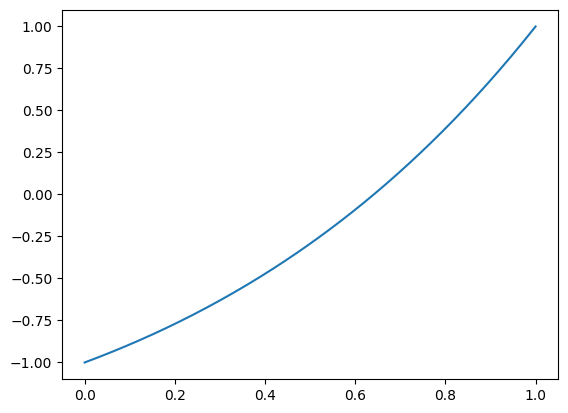

In [37]:
xs = np.linspace(0,1,200)
plt.plot(xs, xs*2**xs-1)

Ищем корень **методом Ньютона**

In [47]:
def f(x):
    return x*2**x-1

def df(x):
    return 2**x*(1+x*np.log(2))

def newton(x, f, df, eps=10**(-6)):
    if f(x)==0:
        return x
    m = f(x)/df(x)
    while abs(m) >= eps:
        x-=m
        m = f(x)/df(x)
    return x, m

In [48]:
newton(0.8,f, df)

(0.6411857514224597, 6.917473694344726e-09)

## **Задание 5 - Зри в корень дважды**

a)
$$
\left\{\begin{array}{l}
\sin (x+1)-y=1.2 \\
2 x+\cos (y)=2
\end{array}\right.

\Leftrightarrow

\left\{\begin{array}{l}
\sin (x+1)-1.2-y=0 \\
2x+\cos (y) -2 = 0
\end{array}\right.
$$

Решим сведением к глобальному минимуму функцию $\Psi(x)$ (благо система небольшая)

In [57]:
def psi(x):
    return (np.sin(x[0])-1.2-x[1])**2+(2*x[0]+np.cos(x[1])-2)**2

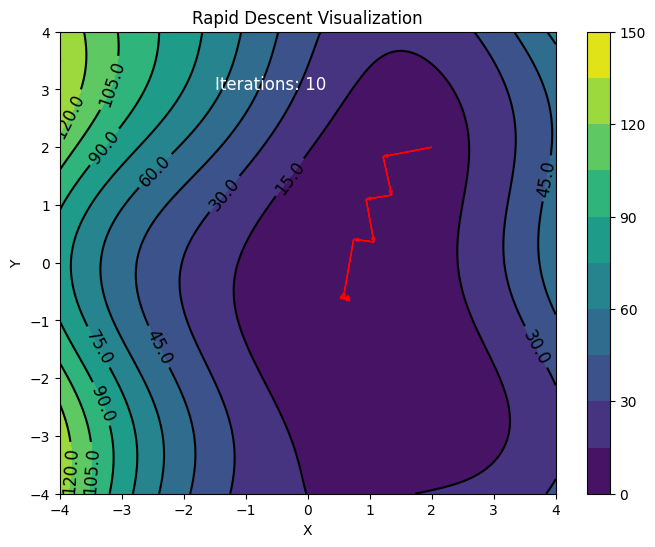

In [67]:
from scipy.optimize import minimize_scalar

def grad_psi(x):
    return np.array([2*(np.sin(x[0])-1.2-x[1])*np.cos(x[0]) + 2*(2*x[0]+np.cos(x[1])-2)*2, 
                     -2*(np.sin(x[0])-1.2-x[1])-2*(2*x[0]+np.cos(x[1])-2)*np.sin(x[0])])

def rapid_descent(starting_point, epsilon):
    x = starting_point
    iterations = 0
    steps = [x]  # Список для хранения шагов алгоритма

    while True:
        phi = lambda a : psi(x - a * grad_psi(x))
        alpha = minimize_scalar(phi).x
        x_new = x - alpha * grad_psi(x)
        iterations += 1
        steps.append(x_new)

        if np.linalg.norm(x_new - x) < epsilon:
            x = x_new
            break

        x = x_new

    return x, iterations, np.array(steps)

# Генерация сетки для построения линий уровня
x = np.linspace(-4, 4, 400)
y = np.linspace(-4, 4, 400)
X, Y = np.meshgrid(x, y)
Z = psi([X,Y])

# Вызов функции градиентного спуска
starting_point = np.array([2, 2])
epsilon = 10**(-3)
min_point, iterations, steps = rapid_descent(starting_point, epsilon)

# Построение графика
plt.figure(figsize=(8, 6))
plt.contourf(X, Y, Z, levels=10, cmap='viridis')
plt.colorbar()

# Построение линий уровня
contour = plt.contour(X, Y, Z, levels=10, colors='black')

# Подписи к линиям уровня
plt.clabel(contour, colors='k', fmt='%2.1f', fontsize=12)

# Построение шагов алгоритма
for i in range(len(steps)-1):
    plt.arrow(steps[i][0], steps[i][1], steps[i+1][0] - steps[i][0], steps[i+1][1] - steps[i][1], 
              shape='full', lw=1, color='red', length_includes_head=True, head_width=0.05, zorder=4)

# Подпись с количеством итераций
plt.text(-1.5, 3, f'Iterations: {iterations}', color='white', fontsize=12)

# Настройка осей и отображение
plt.xlim([-4, 4])
plt.ylim([-4, 4])
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Rapid Descent Visualization')
plt.show()


In [68]:
min_point

array([ 0.59791376, -0.63502838])

Нашли точку глобального минимума $(x_{min}, y_{min})$ с нужной точностью (сюрприз-сюрприз -- значение $\Psi(x)$ в ней равно 0, то есть исходная система решилась)

б)
$$
\left\{\begin{array}{l}
\tan (x y+0.4)=x^2 \\
0.6 x^2+2 y^2 = 1
\end{array}\right.

\Leftrightarrow

\left\{\begin{array}{l}
\tan (x y+0.4) - x^2 = 0 \\
0.6 x^2+2 y^2 - 1 = 0
\end{array}\right.
$$

Решим методом Ньютона

In [69]:
import sympy as smp

# Определение переменных
x, y = smp.symbols('x, y')

# Определение уравнений
eq1 = smp.tan(x*y+0.4)-x**2
eq2 = 0.6*x**2+2*y**2-1

# Создание списка уравнений
equations = [eq1, eq2]

# Нахождение Якобиана
Jacobian_matrix = smp.Matrix([[smp.diff(eq, var) for var in (x, y)] for eq in equations])

# Вывод уравнений и матрицы Якоби
print("Система уравнений:")
for eq in equations:
    display(eq)

print("\nМатрица Якоби:")
display(Jacobian_matrix)

Система уравнений:


-x**2 + tan(x*y + 0.4)

0.6*x**2 + 2*y**2 - 1


Матрица Якоби:


Matrix([
[-2*x + y*(tan(x*y + 0.4)**2 + 1), x*(tan(x*y + 0.4)**2 + 1)],
[                           1.2*x,                       4*y]])

In [75]:
def F(x):
    return np.array(
        [np.tan(x[0]*x[1]+0.4)-x[0]**2, 0.6*x[0]**2+2*x[1]**2-1])

def J(x):
    return np.array(
        [[-2*x[0]+x[1]*(1+np.tan(x[0]*x[1]+0.4)**2),x[0]*(1+np.tan(x[0]*x[1]+0.4)**2)],
         [1.2*x[0],4*x[1]]])

def Newton_system(F, J, x, eps):
    """
    Solve nonlinear system F=0 by Newton's method.
    J is the Jacobian of F. Both F and J must be functions of x.
    At input, x holds the start value. The iteration continues
    until ||F|| < eps.
    """
    F_value = F(x)
    F_norm = np.linalg.norm(F_value, ord=2)  # l2 norm of vector
    iteration_counter = 0
    while abs(F_norm) > eps and iteration_counter < 100:
        delta = np.linalg.solve(J(x), -F_value)
        x = x + delta
        F_value = F(x)
        F_norm = np.linalg.norm(F_value, ord=2)
        iteration_counter += 1

    # Here, either a solution is found, or too many iterations
    if abs(F_norm) > eps:
        iteration_counter = -1
    return x, iteration_counter

In [77]:
Newton_system(F,J,np.array([1,1]), eps=10**(-3))

(array([1.0484006 , 0.41262866]), 4)

## **Задание 6 - Оценка скорости сходимости метода Ньютона**

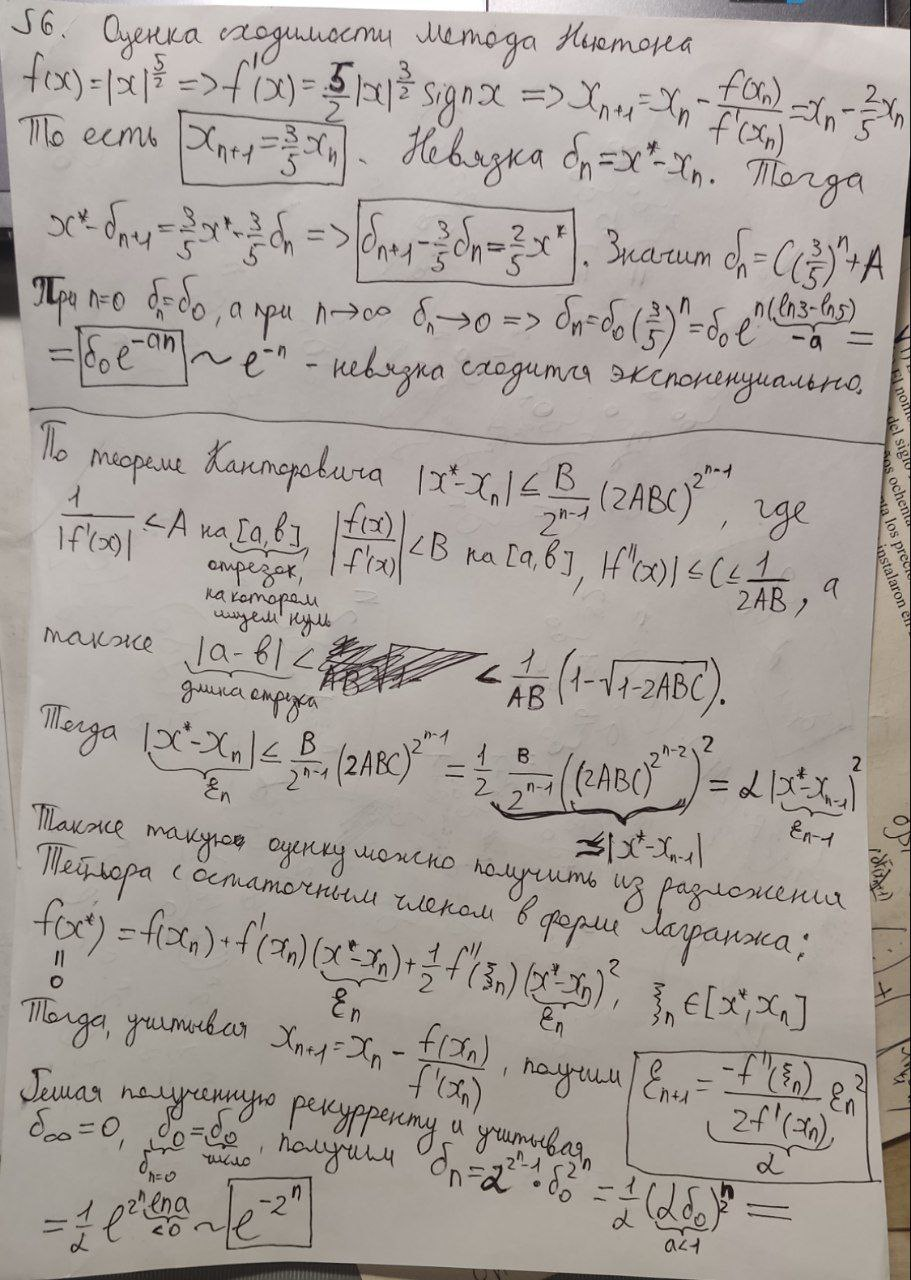